In [3]:
# all libraries required for the entire EDA

from requests import get
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
from seaborn_qqplot import pplot
import pandas as pd

import datetime as dt
from scipy import stats
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

%matplotlib inline
sns.set(color_codes=True)

In [4]:
df_raw= pd.read_csv('../data/output_data/data_mass_2023-03-10 09-17.csv',sep=';',skipinitialspace=True)

In [5]:
temp = df_raw

train, test = train_test_split(temp, test_size=0.2, random_state=0)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar']]
y = train.lifespan
regr = linear_model.LinearRegression()
regr.fit(X, y) 
score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)
a1=score

coefficient of determination(R²) vanilla: 0.9748689535819207


In [6]:

temp['bmi'] = temp['mass']/(temp['length']/100)**2
train, test = train_test_split(temp, test_size=0.2, random_state=0)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','bmi']]
y = train.lifespan
regr = linear_model.LinearRegression()
regr.fit(X, y) 
score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','bmi']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) with feature BMI:', score)
a2=score

coefficient of determination(R²) with feature BMI: 0.9766837279606151


In [7]:
m = (a2/a1)-1
print(m*100,'% increase in accuracy')

0.1861557260620872 % increase in accuracy


In [8]:
# ... een bmi_categorie met de 8 officiele categoerieën 

df_bmi = temp.copy()
bmi_groups = [0, 16,17, 18.5, 25, 30,35,40,np.inf]
df_bmi['bmi_category']= pd.cut(temp['bmi'], bins=bmi_groups, labels=['severe_thinness','moderate_thinness','mild_thinness','normal_weight','over_weight','obese_1','obese_2','obese_3'] )

display(df_bmi.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,labels,bmi,bmi_category
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,76,29.130752,over_weight
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,-1,35.627366,obese_2
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,-1,35.963326,obese_2
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,-1,41.418798,obese_3
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,-1,22.598157,normal_weight


In [9]:
# ... maak een column van de 3 officiele kleinere bmi groepen .  

bmi_narrow_groups = [0, 18.5, 25,np.inf]
# df_bmi['bmi_narrow']= pd.cut(temp['bmi'], bins=bmi_narrow_groups, labels=['under_weight','normal_weight','over_weight'] )
df_bmi['bmi_narrow']= pd.cut(temp['bmi'], bins=bmi_narrow_groups, labels=['moderate_thinness','normal_weight','obese_2'] )
df_bmi.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,labels,bmi,bmi_category,bmi_narrow
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,76,29.130752,over_weight,obese_2
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,-1,35.627366,obese_2,obese_2
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,-1,35.963326,obese_2,obese_2
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,-1,41.418798,obese_3,obese_2
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,-1,22.598157,normal_weight,normal_weight


<AxesSubplot: xlabel='bmi_category', ylabel='lifespan'>

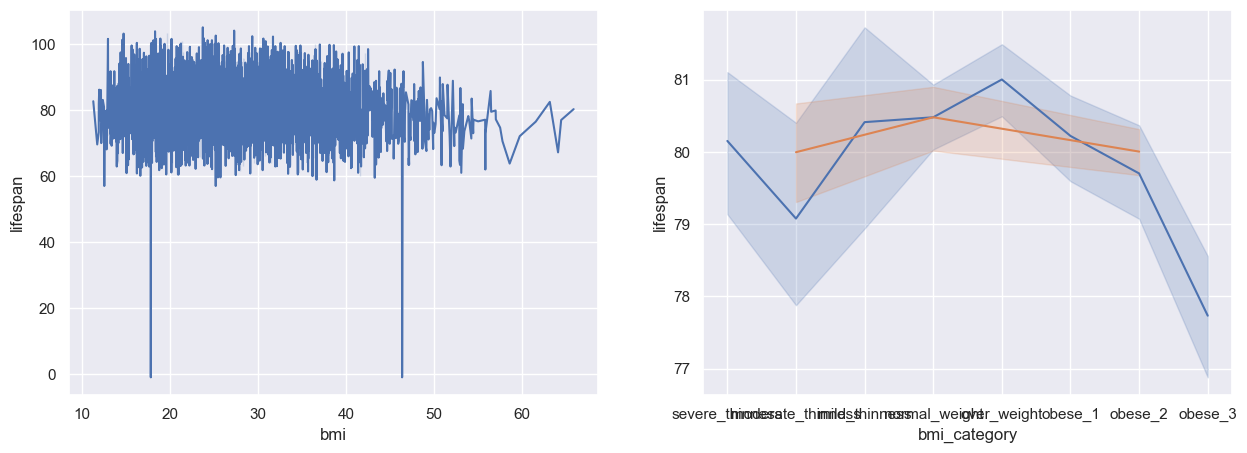

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(temp,x='bmi', y='lifespan', ax=axes[0])
sns.lineplot(df_bmi,x='bmi_category', y='lifespan', ax=axes[1])
sns.lineplot(df_bmi,x='bmi_narrow', y='lifespan', ax=axes[1])

In [11]:
temp = temp.drop('labels', axis=1)
display(temp.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.130752
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,35.627366
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,35.963326
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.418798
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,22.598157
